In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os

# mlflow imports
import mlflow
import mlflow.keras
import mlflow.tensorflow

2022-03-09 14:27:28.935292: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Text(0.5, 1.0, '5')

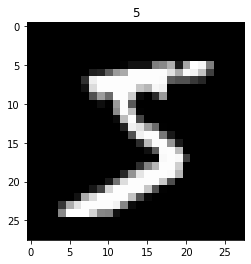

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [3]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
server = "http://localhost:5000"
mlflow.set_tracking_uri(server)

mlflow.set_experiment('nn-experiment')

def train_nn(hidden_layers, n_units, activation, drop_out, epochs):
    # iniciando experimento com mlflow
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()

        # registrando tags com hiperparâmetros
        mlflow.set_tag('epochs', epochs)
        mlflow.set_tag('hidden layers', hidden_layers)
        mlflow.set_tag('n_units', n_units)
        mlflow.set_tag('drop_out', drop_out)

        model = Sequential()

        # camadas de entrada e primeira camada oculta
        model.add(Dense(units=n_units, activation=activation, input_dim=784))
        model.add(Dropout(drop_out))

        # camadas ocultas
        for _ in range(hidden_layers -1):
            model.add(Dense(units=n_units, activation=activation))
            model.add(Dropout(drop_out))

        # camada de saida
        model.add(Dense(units=10, activation='softmax'))

        # compilando o modelo
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # estrutura do modelo
        model.summary()

        # treinamento
        hist = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=epochs)

        # grafico de treinamento
        hist.history.keys()
        plt.plot(hist.history['val_loss'])
        plt.savefig('loss.png')
        plt.plot(hist.history['val_accuracy'])
        plt.savefig('accuracy.png')

        # registrando graficos
        mlflow.log_artifact('loss.png')
        mlflow.log_artifact('accuracy.png')

        # info execucao
        print('Modelo: ', mlflow.active_run().info.run_uuid)
    mlflow.end_run()

2022/03/09 14:28:42 INFO mlflow.tracking.fluent: Experiment with name 'nn-experiment' does not exist. Creating a new experiment.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                11775     
_________________________________________________________________
dropout_8 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                160       
Total params: 12,175
Trainable params: 12,175
Non-trainable params: 0
_________________________________________________________________


2022-03-09 14:28:48.812960: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:28:48.812989: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:28:48.813056: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:28:48.813074: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 220/1875 [==>...........................] - ETA: 1s - loss: 2.0032 - accuracy: 0.2670

2022-03-09 14:28:49.168488: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:28:49.168507: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:28:49.168546: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:28:49.186839: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:28:49.187435: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:28:49.187805: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:28:49.188409: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpc08rch87/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 966us/step - loss: 1.2610 - accuracy: 0.5598 - val_loss: 0.3753 - val_accuracy: 0.8996
Epoch 2/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.6491 - accuracy: 0.7875 - val_loss: 0.3170 - val_accuracy: 0.9124
Epoch 3/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.5677 - accuracy: 0.8152 - val_loss: 0.2925 - val_accuracy: 0.9161
Epoch 4/5
1875/1875 [==============================] - 2s 899us/step - loss: 0.5245 - accuracy: 0.8351 - val_loss: 0.2760 - val_accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.5025 - accuracy: 0.8406 - val_loss: 0.2643 - val_accuracy: 0.9290
INFO:tensorflow:Assets written to: /tmp/tmpn8k90hbz/model/data/model/assets
Modelo:  4b798b2f1d6e43729c2ee76afbcf8891
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Den

2022-03-09 14:29:00.440792: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:00.440815: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:00.440877: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:00.440892: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 213/1875 [==>...........................] - ETA: 1s - loss: 2.1161 - accuracy: 0.1974

2022-03-09 14:29:00.786135: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:00.786152: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:00.786192: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:00.800936: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:29:00.801374: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:29:00.801650: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:29:00.802055: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp59a3iiyc/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 1.4636 - accuracy: 0.4627 - val_loss: 0.4630 - val_accuracy: 0.8871
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8144 - accuracy: 0.7208 - val_loss: 0.3651 - val_accuracy: 0.9061
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7388 - accuracy: 0.7544 - val_loss: 0.3203 - val_accuracy: 0.9166
Epoch 4/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.7084 - accuracy: 0.7698 - val_loss: 0.3054 - val_accuracy: 0.9165
Epoch 5/5
1875/1875 [==============================] - 2s 989us/step - loss: 0.6825 - accuracy: 0.7803 - val_loss: 0.3030 - val_accuracy: 0.9194
INFO:tensorflow:Assets written to: /tmp/tmpnm9glg_w/model/data/model/assets
Modelo:  1126994db19d4af788990f7f51f24e61
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)   

2022-03-09 14:29:13.297816: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:13.297844: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:13.297941: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:13.297964: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 192/1875 [==>...........................] - ETA: 1s - loss: 1.8971 - accuracy: 0.3627

2022-03-09 14:29:13.650054: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:13.650073: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:13.650179: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:13.668633: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:29:13.669045: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:29:13.669322: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:29:13.669729: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp_30huakj/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 1.0257 - accuracy: 0.6718 - val_loss: 0.3238 - val_accuracy: 0.9042
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4600 - accuracy: 0.8591 - val_loss: 0.2743 - val_accuracy: 0.9209
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4078 - accuracy: 0.8744 - val_loss: 0.2470 - val_accuracy: 0.9267
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8856 - val_loss: 0.2448 - val_accuracy: 0.9282
Epoch 5/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.3566 - accuracy: 0.8916 - val_loss: 0.2320 - val_accuracy: 0.9313
INFO:tensorflow:Assets written to: /tmp/tmpxe8qkqiu/model/data/model/assets
Modelo:  2f9c7246aa994a598e9398f27f15473f
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)     

2022-03-09 14:29:25.879226: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:25.879256: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:25.879333: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:25.879351: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 213/1875 [==>...........................] - ETA: 1s - loss: 1.9961 - accuracy: 0.2701

2022-03-09 14:29:26.225100: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:26.225118: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:26.225157: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:26.235796: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:29:26.236173: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:29:26.236442: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:29:26.236841: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpih9kqd9x/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 1.1388 - accuracy: 0.6109 - val_loss: 0.2884 - val_accuracy: 0.9167
Epoch 2/5
1875/1875 [==============================] - 2s 961us/step - loss: 0.4900 - accuracy: 0.8503 - val_loss: 0.2336 - val_accuracy: 0.9333
Epoch 3/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.4315 - accuracy: 0.8703 - val_loss: 0.2307 - val_accuracy: 0.9321
Epoch 4/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.4086 - accuracy: 0.8779 - val_loss: 0.2076 - val_accuracy: 0.9405
Epoch 5/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.3840 - accuracy: 0.8853 - val_loss: 0.1892 - val_accuracy: 0.9439
INFO:tensorflow:Assets written to: /tmp/tmpg63x3zq5/model/data/model/assets
Modelo:  f53b208e34404de98bfff0aee98696f1
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense

2022-03-09 14:29:38.062999: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:38.063022: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:38.063086: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:38.063099: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 222/1875 [==>...........................] - ETA: 1s - loss: 1.9857 - accuracy: 0.2924

2022-03-09 14:29:38.416228: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:38.416249: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:38.416292: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:38.430775: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:29:38.431174: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:29:38.431451: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:29:38.431865: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpp_sta0w7/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 1.2851 - accuracy: 0.5607 - val_loss: 0.3629 - val_accuracy: 0.9067
Epoch 2/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.6695 - accuracy: 0.7881 - val_loss: 0.2951 - val_accuracy: 0.9213
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5919 - accuracy: 0.8156 - val_loss: 0.2801 - val_accuracy: 0.9254
Epoch 4/5
1875/1875 [==============================] - 2s 996us/step - loss: 0.5477 - accuracy: 0.8296 - val_loss: 0.2685 - val_accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.5315 - accuracy: 0.8369 - val_loss: 0.2633 - val_accuracy: 0.9280
INFO:tensorflow:Assets written to: /tmp/tmp28m_2wep/model/data/model/assets
Modelo:  31a5f63d57d547728041176314aacc2f
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense) 

2022-03-09 14:29:50.512561: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:50.512599: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:50.512707: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:50.512729: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 224/1875 [==>...........................] - ETA: 1s - loss: 1.8477 - accuracy: 0.3327

2022-03-09 14:29:50.877084: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:29:50.877105: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:29:50.877148: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:29:50.887742: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:29:50.888140: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:29:50.888503: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:29:50.888908: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpv0uh8dzr/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 0.9350 - accuracy: 0.6860 - val_loss: 0.2531 - val_accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.3506 - accuracy: 0.8933 - val_loss: 0.2171 - val_accuracy: 0.9364
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3133 - accuracy: 0.9044 - val_loss: 0.1972 - val_accuracy: 0.9400
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2765 - accuracy: 0.9157 - val_loss: 0.1853 - val_accuracy: 0.9438
Epoch 5/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.2653 - accuracy: 0.9196 - val_loss: 0.1827 - val_accuracy: 0.9456
INFO:tensorflow:Assets written to: /tmp/tmpli2re4s5/model/data/model/assets
Modelo:  d784bd45417b41529a0e4b03021a53f7
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)  

2022-03-09 14:30:03.397511: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:03.397542: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:03.397630: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:03.397653: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 210/1875 [==>...........................] - ETA: 1s - loss: 1.7938 - accuracy: 0.3718

2022-03-09 14:30:03.744368: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:03.744385: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:03.744430: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:03.759479: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:30:03.759913: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:30:03.760220: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:30:03.760689: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpdcmp11mq/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1000us/step - loss: 0.9077 - accuracy: 0.7019 - val_loss: 0.2300 - val_accuracy: 0.9317
Epoch 2/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.3575 - accuracy: 0.8929 - val_loss: 0.1906 - val_accuracy: 0.9426
Epoch 3/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.3040 - accuracy: 0.9093 - val_loss: 0.1725 - val_accuracy: 0.9469
Epoch 4/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.2712 - accuracy: 0.9188 - val_loss: 0.1519 - val_accuracy: 0.9543
Epoch 5/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.2517 - accuracy: 0.9251 - val_loss: 0.1468 - val_accuracy: 0.9575
INFO:tensorflow:Assets written to: /tmp/tmpcooj0cii/model/data/model/assets
Modelo:  6995a9741c37427599833951c41887d4
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (D

2022-03-09 14:30:15.457667: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:15.457692: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:15.457768: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:15.457786: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 203/1875 [==>...........................] - ETA: 1s - loss: 1.9498 - accuracy: 0.3005

2022-03-09 14:30:15.819597: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:15.819617: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:15.819665: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:15.831598: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:30:15.832009: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:30:15.832335: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:30:15.832765: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpa0dqj1rs/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 1.0910 - accuracy: 0.6305 - val_loss: 0.2778 - val_accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 2s 977us/step - loss: 0.4760 - accuracy: 0.8572 - val_loss: 0.2173 - val_accuracy: 0.9364
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4077 - accuracy: 0.8791 - val_loss: 0.2070 - val_accuracy: 0.9395
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3678 - accuracy: 0.8887 - val_loss: 0.1959 - val_accuracy: 0.9409
Epoch 5/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.3526 - accuracy: 0.8950 - val_loss: 0.1856 - val_accuracy: 0.9458
INFO:tensorflow:Assets written to: /tmp/tmpi2zemkba/model/data/model/assets
Modelo:  3aff014d84b747dda25d2eb50dd8af2d
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)  

2022-03-09 14:30:27.889435: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:27.889466: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:27.889547: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:27.889572: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 204/1875 [==>...........................] - ETA: 1s - loss: 1.6339 - accuracy: 0.4469

2022-03-09 14:30:28.240198: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:28.240218: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:28.240272: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:28.252313: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:30:28.252719: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:30:28.253028: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:30:28.253467: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpylssd36a/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 2s 1ms/step - loss: 0.7488 - accuracy: 0.7631 - val_loss: 0.1973 - val_accuracy: 0.9408
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2634 - accuracy: 0.9206 - val_loss: 0.1577 - val_accuracy: 0.9541
Epoch 3/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.2117 - accuracy: 0.9386 - val_loss: 0.1366 - val_accuracy: 0.9579
Epoch 4/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.1856 - accuracy: 0.9435 - val_loss: 0.1383 - val_accuracy: 0.9591
Epoch 5/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.1733 - accuracy: 0.9475 - val_loss: 0.1216 - val_accuracy: 0.9651
INFO:tensorflow:Assets written to: /tmp/tmpozj5g40r/model/data/model/assets
Modelo:  c89f0dee6e144f8b93da5adee1f231b1
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)

2022-03-09 14:30:40.345060: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:40.345088: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:40.345160: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:40.345178: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 178/1875 [=>............................] - ETA: 1s - loss: 2.2296 - accuracy: 0.1570

2022-03-09 14:30:40.757226: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:40.757247: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:40.757292: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:40.773238: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:30:40.773753: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:30:40.774079: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:30:40.774516: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp5qq59b5r/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.7744 - accuracy: 0.3652 - val_loss: 0.8142 - val_accuracy: 0.7629
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0978 - accuracy: 0.6186 - val_loss: 0.6438 - val_accuracy: 0.8386
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9612 - accuracy: 0.6972 - val_loss: 0.5832 - val_accuracy: 0.8557
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9168 - accuracy: 0.7147 - val_loss: 0.5424 - val_accuracy: 0.8708
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8824 - accuracy: 0.7287 - val_loss: 0.5137 - val_accuracy: 0.8784
INFO:tensorflow:Assets written to: /tmp/tmp829i9vq7/model/data/model/assets
Modelo:  864eab5755174727850972a6ee51a6ca
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)      

2022-03-09 14:30:55.435036: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:55.435065: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:55.435146: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:55.435167: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 170/1875 [=>............................] - ETA: 2s - loss: 2.2868 - accuracy: 0.1212

2022-03-09 14:30:55.926050: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:30:55.926077: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:30:55.926153: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:30:55.942396: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:30:55.942920: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:30:55.943227: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:30:55.943661: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmprax7aren/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.9158 - accuracy: 0.2599 - val_loss: 1.2404 - val_accuracy: 0.4860
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4028 - accuracy: 0.4361 - val_loss: 1.0847 - val_accuracy: 0.5961
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3196 - accuracy: 0.4780 - val_loss: 1.0551 - val_accuracy: 0.6137
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2395 - accuracy: 0.5132 - val_loss: 0.9871 - val_accuracy: 0.6459
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2121 - accuracy: 0.5306 - val_loss: 0.9535 - val_accuracy: 0.6410
INFO:tensorflow:Assets written to: /tmp/tmpvjjutl1h/model/data/model/assets
Modelo:  5cb8bd9671a14910a4a9405289aefc0b
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)      

2022-03-09 14:31:10.488049: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:10.488086: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:10.488189: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:10.488221: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 182/1875 [=>............................] - ETA: 1s - loss: 2.1901 - accuracy: 0.1567

2022-03-09 14:31:10.908601: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:10.908625: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:10.908675: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:10.924018: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:31:10.924521: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:31:10.924821: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:31:10.925237: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpvree9xgx/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.4521 - accuracy: 0.4690 - val_loss: 0.4472 - val_accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6503 - accuracy: 0.8053 - val_loss: 0.3468 - val_accuracy: 0.9085
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5505 - accuracy: 0.8391 - val_loss: 0.3345 - val_accuracy: 0.9132
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5253 - accuracy: 0.8493 - val_loss: 0.3253 - val_accuracy: 0.9148
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4973 - accuracy: 0.8562 - val_loss: 0.2990 - val_accuracy: 0.9226
INFO:tensorflow:Assets written to: /tmp/tmpeaeg3vpq/model/data/model/assets
Modelo:  a7234a462c7c459b9d1bdf0c06bcc239
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)      

2022-03-09 14:31:25.762021: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:25.762048: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:25.762126: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:25.762144: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 152/1875 [=>............................] - ETA: 2s - loss: 2.2592 - accuracy: 0.1348

2022-03-09 14:31:26.231232: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:26.231252: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:26.231297: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:26.250145: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:31:26.250672: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:31:26.251012: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:31:26.251479: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp5vacbkl3/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.5478 - accuracy: 0.4357 - val_loss: 0.5140 - val_accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7902 - accuracy: 0.7465 - val_loss: 0.3908 - val_accuracy: 0.9033
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6829 - accuracy: 0.7924 - val_loss: 0.3578 - val_accuracy: 0.9091
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6123 - accuracy: 0.8228 - val_loss: 0.3249 - val_accuracy: 0.9184
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6015 - accuracy: 0.8319 - val_loss: 0.3364 - val_accuracy: 0.9133
INFO:tensorflow:Assets written to: /tmp/tmp2ro9n69l/model/data/model/assets
Modelo:  768c3117e0834f2eacd33a7b8e61aed4
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)      

2022-03-09 14:31:40.825438: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:40.825465: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:40.825548: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:40.825573: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 163/1875 [=>............................] - ETA: 2s - loss: 2.2859 - accuracy: 0.1328

2022-03-09 14:31:41.242844: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:41.242866: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:41.242912: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:41.262182: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:31:41.262693: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:31:41.263012: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:31:41.263449: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpx0kwvqfu/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.8073 - accuracy: 0.3308 - val_loss: 0.8345 - val_accuracy: 0.7379
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1694 - accuracy: 0.5750 - val_loss: 0.7224 - val_accuracy: 0.7726
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0468 - accuracy: 0.6238 - val_loss: 0.6806 - val_accuracy: 0.7863
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9933 - accuracy: 0.6541 - val_loss: 0.6259 - val_accuracy: 0.8007
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9377 - accuracy: 0.6730 - val_loss: 0.6062 - val_accuracy: 0.7956
INFO:tensorflow:Assets written to: /tmp/tmpg418letb/model/data/model/assets
Modelo:  9cea36be206340fc924dc072c7d53345
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)      

2022-03-09 14:31:55.804818: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:55.804847: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:55.804927: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:55.804947: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 157/1875 [=>............................] - ETA: 2s - loss: 2.1336 - accuracy: 0.1615

2022-03-09 14:31:56.216203: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:31:56.216229: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:31:56.216288: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:31:56.236295: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:31:56.236865: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:31:56.237195: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:31:56.238223: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp2xtxv8bh/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.2525 - accuracy: 0.5416 - val_loss: 0.3111 - val_accuracy: 0.9165
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5018 - accuracy: 0.8584 - val_loss: 0.2835 - val_accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4229 - accuracy: 0.8818 - val_loss: 0.2428 - val_accuracy: 0.9328
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3824 - accuracy: 0.8954 - val_loss: 0.2378 - val_accuracy: 0.9367
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3577 - accuracy: 0.9039 - val_loss: 0.2204 - val_accuracy: 0.9420
INFO:tensorflow:Assets written to: /tmp/tmpnagh044b/model/data/model/assets
Modelo:  3f5df94f8ff644a598c614f9d0367530
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)      

2022-03-09 14:32:10.818179: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:10.818213: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:10.818300: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:10.818323: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 165/1875 [=>............................] - ETA: 2s - loss: 2.1675 - accuracy: 0.1887

2022-03-09 14:32:11.230475: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:11.230496: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:11.230545: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:11.247289: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:32:11.247824: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:32:11.248130: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:32:11.248666: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpthijjuw6/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.2865 - accuracy: 0.5396 - val_loss: 0.3150 - val_accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5051 - accuracy: 0.8634 - val_loss: 0.2458 - val_accuracy: 0.9334
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4278 - accuracy: 0.8868 - val_loss: 0.2300 - val_accuracy: 0.9389
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.9001 - val_loss: 0.2207 - val_accuracy: 0.9386
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3578 - accuracy: 0.9080 - val_loss: 0.2219 - val_accuracy: 0.9435
INFO:tensorflow:Assets written to: /tmp/tmp1kqsyyxm/model/data/model/assets
Modelo:  29938c4ab4304ddcb3697d9c7a518cbe
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)      

2022-03-09 14:32:26.089978: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:26.090007: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:26.090081: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:26.090099: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 165/1875 [=>............................] - ETA: 2s - loss: 2.2584 - accuracy: 0.1330

2022-03-09 14:32:26.504253: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:26.504276: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:26.504325: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:26.524643: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:32:26.525174: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:32:26.525528: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:32:26.526001: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpyz5pbsr7/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.6457 - accuracy: 0.3908 - val_loss: 0.6989 - val_accuracy: 0.7218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9638 - accuracy: 0.6389 - val_loss: 0.6296 - val_accuracy: 0.7318
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8586 - accuracy: 0.6742 - val_loss: 0.5802 - val_accuracy: 0.7538
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8158 - accuracy: 0.6934 - val_loss: 0.5605 - val_accuracy: 0.7506
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7620 - accuracy: 0.7071 - val_loss: 0.5474 - val_accuracy: 0.7554
INFO:tensorflow:Assets written to: /tmp/tmpqvcsshwh/model/data/model/assets
Modelo:  44c39805e34c4715a7f3fda64bd2eb75
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)      

2022-03-09 14:32:41.252747: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:41.252771: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:41.252839: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:41.252854: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 162/1875 [=>............................] - ETA: 2s - loss: 2.0750 - accuracy: 0.2412

2022-03-09 14:32:41.684542: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:41.684565: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:41.684616: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:41.702147: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:32:41.702691: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:32:41.703073: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:32:41.703562: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpb89o5tro/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.0207 - accuracy: 0.6582 - val_loss: 0.2291 - val_accuracy: 0.9339
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3438 - accuracy: 0.9082 - val_loss: 0.1892 - val_accuracy: 0.9471
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2741 - accuracy: 0.9277 - val_loss: 0.1729 - val_accuracy: 0.9520
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2454 - accuracy: 0.9346 - val_loss: 0.1576 - val_accuracy: 0.9566
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2293 - accuracy: 0.9407 - val_loss: 0.1570 - val_accuracy: 0.9555
INFO:tensorflow:Assets written to: /tmp/tmp0ix63dy0/model/data/model/assets
Modelo:  a669e2039c284915acb1c7a29038f948
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)      

2022-03-09 14:32:55.965247: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:55.965279: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:55.965362: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:55.965380: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 134/1875 [=>............................] - ETA: 2s - loss: 2.2954 - accuracy: 0.0938

2022-03-09 14:32:56.463841: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:32:56.463861: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:32:56.463908: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:32:56.487093: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:32:56.487780: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:32:56.488152: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:32:56.488670: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmptu6bv21q/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 2ms/step - loss: 1.9279 - accuracy: 0.2359 - val_loss: 1.4309 - val_accuracy: 0.4109
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5173 - accuracy: 0.3642 - val_loss: 1.4016 - val_accuracy: 0.4081
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4579 - accuracy: 0.3964 - val_loss: 1.3591 - val_accuracy: 0.4334
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4187 - accuracy: 0.4123 - val_loss: 1.3422 - val_accuracy: 0.4397
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4186 - accuracy: 0.4135 - val_loss: 1.3285 - val_accuracy: 0.4549
INFO:tensorflow:Assets written to: /tmp/tmpdplnii9a/model/data/model/assets
Modelo:  b9dbc3df86ba477bae9f236d7532300a
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)     

2022-03-09 14:33:13.581260: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:13.581289: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:13.581367: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:13.581385: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 142/1875 [=>............................] - ETA: 2s - loss: 2.3026 - accuracy: 0.1021

2022-03-09 14:33:14.064222: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:14.064244: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:14.064289: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:14.085655: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:33:14.086337: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:33:14.086690: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:33:14.087209: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpjxizruww/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 2ms/step - loss: 2.0746 - accuracy: 0.1993 - val_loss: 1.7063 - val_accuracy: 0.3391
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7353 - accuracy: 0.2924 - val_loss: 1.6026 - val_accuracy: 0.3069
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6602 - accuracy: 0.3126 - val_loss: 1.5723 - val_accuracy: 0.3045
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6119 - accuracy: 0.3220 - val_loss: 1.5866 - val_accuracy: 0.2855
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5935 - accuracy: 0.3283 - val_loss: 1.5786 - val_accuracy: 0.2849
INFO:tensorflow:Assets written to: /tmp/tmpz5ggovco/model/data/model/assets
Modelo:  017c2840b0c345e1932e197d0b85256b
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)     

2022-03-09 14:33:32.188637: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:32.188663: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:32.188730: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:32.188744: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 117/1875 [>.............................] - ETA: 3s - loss: 2.2643 - accuracy: 0.1119

2022-03-09 14:33:32.733609: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:32.733629: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:32.733676: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:32.764206: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:33:32.765222: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:33:32.765776: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:33:32.766376: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp8drfjuek/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 2ms/step - loss: 1.6931 - accuracy: 0.3232 - val_loss: 0.8328 - val_accuracy: 0.6719
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0164 - accuracy: 0.6088 - val_loss: 0.6851 - val_accuracy: 0.7566
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8939 - accuracy: 0.6782 - val_loss: 0.6249 - val_accuracy: 0.7862
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8419 - accuracy: 0.7110 - val_loss: 0.6521 - val_accuracy: 0.7667
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8131 - accuracy: 0.7253 - val_loss: 0.5759 - val_accuracy: 0.8308
INFO:tensorflow:Assets written to: /tmp/tmp7b5ugego/model/data/model/assets
Modelo:  2675917fa0854fbcbc07ebff6e68aee9
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)     

2022-03-09 14:33:50.114890: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:50.114922: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:50.115033: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:50.115064: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 140/1875 [=>............................] - ETA: 2s - loss: 2.2933 - accuracy: 0.1176

2022-03-09 14:33:50.637217: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:33:50.637238: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:33:50.637280: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:33:50.660612: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:33:50.661299: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:33:50.661668: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:33:50.662235: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpxlcyk2ue/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 2ms/step - loss: 1.8031 - accuracy: 0.3009 - val_loss: 1.0325 - val_accuracy: 0.5598
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1997 - accuracy: 0.4976 - val_loss: 0.9096 - val_accuracy: 0.6199
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0781 - accuracy: 0.5614 - val_loss: 0.8252 - val_accuracy: 0.6511
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0166 - accuracy: 0.5916 - val_loss: 0.7948 - val_accuracy: 0.6381
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9596 - accuracy: 0.6070 - val_loss: 0.7709 - val_accuracy: 0.6559
INFO:tensorflow:Assets written to: /tmp/tmpovhpjyp4/model/data/model/assets
Modelo:  b2e62801d2274625a69806374d95e207
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)     

2022-03-09 14:34:07.034385: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:07.034420: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:07.034504: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:07.034525: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 143/1875 [=>............................] - ETA: 2s - loss: 2.2851 - accuracy: 0.1267

2022-03-09 14:34:07.540236: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:07.540256: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:07.540301: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:07.562470: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:34:07.563117: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:34:07.563464: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:34:07.563954: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp9sw6tsjf/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 2.0397 - accuracy: 0.2174 - val_loss: 1.6439 - val_accuracy: 0.3525
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7199 - accuracy: 0.3166 - val_loss: 1.5226 - val_accuracy: 0.4202
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5921 - accuracy: 0.3613 - val_loss: 1.4262 - val_accuracy: 0.4261
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5191 - accuracy: 0.3776 - val_loss: 1.3442 - val_accuracy: 0.4211
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4693 - accuracy: 0.3865 - val_loss: 1.3434 - val_accuracy: 0.3985
INFO:tensorflow:Assets written to: /tmp/tmptvjtv5ry/model/data/model/assets
Modelo:  27e83026af744f3bb2cf2977664a6541
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)     

2022-03-09 14:34:24.509805: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:24.509832: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:24.509907: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:24.509925: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 131/1875 [=>............................] - ETA: 2s - loss: 2.2373 - accuracy: 0.1654

2022-03-09 14:34:25.011199: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:25.011220: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:25.011263: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:25.037007: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:34:25.037662: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:34:25.038118: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:34:25.038636: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpw1o2x1b7/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.5157 - accuracy: 0.4049 - val_loss: 0.5543 - val_accuracy: 0.8599
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7011 - accuracy: 0.7966 - val_loss: 0.3783 - val_accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5617 - accuracy: 0.8540 - val_loss: 0.3427 - val_accuracy: 0.9142
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5020 - accuracy: 0.8732 - val_loss: 0.3096 - val_accuracy: 0.9256
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4765 - accuracy: 0.8792 - val_loss: 0.3006 - val_accuracy: 0.9272
INFO:tensorflow:Assets written to: /tmp/tmpr2_mq_pe/model/data/model/assets
Modelo:  31661aaf0ecd49f0bff1eb4f9ac112a1
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)     

2022-03-09 14:34:41.160208: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:41.160233: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:41.160301: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:41.160318: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 139/1875 [=>............................] - ETA: 2s - loss: 2.2707 - accuracy: 0.1273

2022-03-09 14:34:41.680624: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:41.680644: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:41.680687: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:41.703647: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:34:41.704291: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:34:41.704638: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:34:41.705215: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp0oecr2or/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.8397 - accuracy: 0.2816 - val_loss: 0.9454 - val_accuracy: 0.6313
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0302 - accuracy: 0.6174 - val_loss: 0.6019 - val_accuracy: 0.7722
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8163 - accuracy: 0.7333 - val_loss: 0.4900 - val_accuracy: 0.8353
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7133 - accuracy: 0.7655 - val_loss: 0.4489 - val_accuracy: 0.8384
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6691 - accuracy: 0.7833 - val_loss: 0.4189 - val_accuracy: 0.8567
INFO:tensorflow:Assets written to: /tmp/tmp2wb2q832/model/data/model/assets
Modelo:  cf61284d868a48bbb0c3051c4baea598
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)     

2022-03-09 14:34:58.051833: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:58.051861: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:58.051936: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:58.051955: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
 144/1875 [=>............................] - ETA: 2s - loss: 2.2895 - accuracy: 0.1322

2022-03-09 14:34:58.557845: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:34:58.557866: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:34:58.557908: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:34:58.580587: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:34:58.581270: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:34:58.581648: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:34:58.582181: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmptjv45ngw/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 1ms/step - loss: 1.9021 - accuracy: 0.2689 - val_loss: 1.2786 - val_accuracy: 0.4816
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3500 - accuracy: 0.4414 - val_loss: 1.1764 - val_accuracy: 0.4784
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2651 - accuracy: 0.4831 - val_loss: 1.1799 - val_accuracy: 0.4459
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2180 - accuracy: 0.5062 - val_loss: 1.1060 - val_accuracy: 0.4820
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1783 - accuracy: 0.5211 - val_loss: 1.0895 - val_accuracy: 0.4917
INFO:tensorflow:Assets written to: /tmp/tmp1y0mu6y8/model/data/model/assets


2022/03/09 14:35:24 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp1y0mu6y8/model, flavor: keras), fall back to return ['tensorflow==2.4.1']. Set logging level to DEBUG to see the full traceback.


Modelo:  9ad21972b8ce49b18778c60cb5deac80
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 30)                23550     
_________________________________________________________________
dropout_135 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_136 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_137 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_168 (

2022-03-09 14:35:24.642948: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:35:24.642976: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:35:24.643051: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:35:24.643068: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/5
  91/1875 [>.............................] - ETA: 3s - loss: 2.2632 - accuracy: 0.1536

2022-03-09 14:35:25.140855: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-09 14:35:25.140876: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-09 14:35:25.140918: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-03-09 14:35:25.176318: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-09 14:35:25.177360: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-09 14:35:25.177900: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-09 14:35:25.178681: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmpd7z93x65/train/plugins/profile/2022_03_09_

1875/1875 [==============================] - 3s 2ms/step - loss: 1.2872 - accuracy: 0.5319 - val_loss: 0.3510 - val_accuracy: 0.9084
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4756 - accuracy: 0.8680 - val_loss: 0.2618 - val_accuracy: 0.9294
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3751 - accuracy: 0.9013 - val_loss: 0.2241 - val_accuracy: 0.9420
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.9138 - val_loss: 0.2166 - val_accuracy: 0.9441
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3122 - accuracy: 0.9201 - val_loss: 0.1961 - val_accuracy: 0.9493
INFO:tensorflow:Assets written to: /tmp/tmpj1q3dh5u/model/data/model/assets
Modelo:  98ecfa33887f46d688531ebceddf0f4d


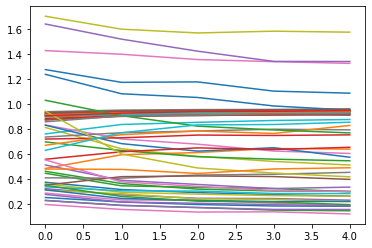

In [13]:
# hiperparâmetros
epochs = [5]
hidden = [2, 5, 8]
n_units = [15, 20, 30]
drop_out = [0.2, 0.3, 0.1]

# testando todas as combinações
for epoch in epochs:
    for layers in hidden:
        for units in n_units:
            for do in drop_out:
                train_nn(hidden_layers=layers, n_units=units, activation='relu', drop_out=do, epochs=epoch)